# Import Libs

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  4 14:03:24 2024

@author:
"""
#%% Standard library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from statistics import mean
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, GridSearchCV
from sklearn.base import clone

from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
        balanced_accuracy_score,
        classification_report,
        accuracy_score,
        recall_score,
        f1_score,
        log_loss
    )

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import utils_ClassIm as utils

# import pour la partie CNN
from keras import backend as K 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from scipy.stats import sem, t

#import transfer
from keras.applications.vgg16 import VGG16
from keras.models import Model

import warnings
warnings.filterwarnings("ignore")

2025-01-15 17:07:16.712388: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-15 17:07:16.978307: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-15 17:07:17.163337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736957237.286345   47504 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736957237.343874   47504 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 17:07:17.761927: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Load data and train test split
imdatatrain, caractrain
imdatatest,  caractest

In [2]:
plt.close('all')

# Main
# Partie 1.1 Recuperation de la base de données type DataFrame
database = pd.read_csv('./database.csv')

# Paramètres
# Etude sur catégorie 2 classes == 0 ou 8 classes == 1
ColLabels = 1


#remettre les données dans l'ordre des images
base_ordre=database.sort_values(by=['Numero'])

# Etude sur catégorie 2 classes ColLabels=0 ou 8 classes ColLabels= 1 uniquement
ColLabels = 1

# Partie 1.2
utils.show_database(database,1,2) # pour verifier les bases et afficher un exemple images

# Base_im,label1,label2,Caract=utils.lire_images_et_carac(".\\images_128\\images_128",'./database.csv',2688,sous_ech=2)

# with open('data.tout_128', 'wb') as f:
#     pickle.dump([Base_im,label1,label2,Caract],f)

# # Pour charger toutes les données de la base "à la matlab" comme un load
# # Ca suppose que le fichier data.pickle a déjà été fait

with open('data.tout_128', 'rb') as f:
    Base_im, label1, label2, caract = pickle.load(f) # list d'images, array de classe, ''', list de caracteristiques (features)

Base_im=np.array(Base_im)
caract=np.array(caract)

Base_im=(Base_im/255)-0.5


# Divider en TRAIN et TEST
Base_tot=list(zip(Base_im, caract))
datatrain, datatest, datalabeltrain, datalabeltest = train_test_split(Base_tot, label2-2, test_size=0.2, random_state=777)
imtrain,caractrain=zip(*datatrain)
imtest,caractest=zip(*datatest)

mc=[]
titre=[]
report=[]
resu_acc=[]
resu_acc_class=[]
int_conf=[]

Contenu Total: 2688
Classée Artificielle: 1216
Classée Naturelle: 1472
Classée Côte: 360
Classée Forêt: 328
Classée Autoroute: 260
Classée Ville: 308
Classée Montagne: 374
Classée Paysage Ouvert: 410
Classée Rue: 292
Classée Grand Batiment: 356
 


#  PLOT LDA ET ACP

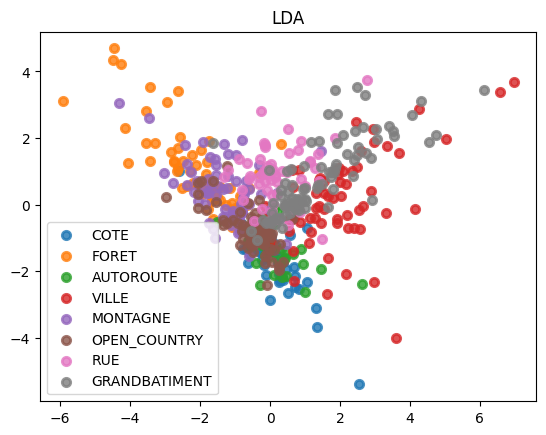

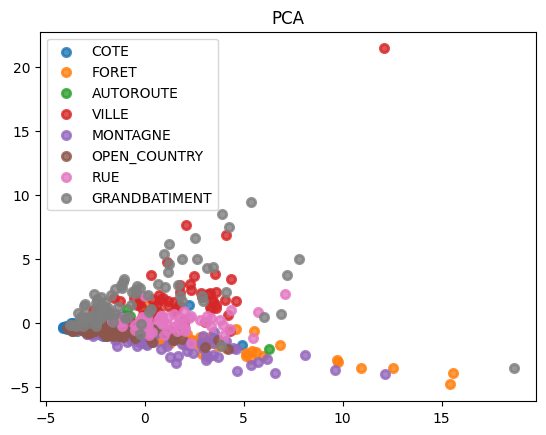

In [3]:
def plot_scatter(X_comp, y, labels_names, title):
    classes = list(np.unique(y))
    lw = 2

    for i, target_name in zip(classes, labels_names):
        plt.scatter(
            X_comp[y == i, 0],
            X_comp[y == i, 1],
            #color=color,
            alpha=0.8,
            lw=lw,
            label=target_name
        )

    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title(title)


###### Ensemble les donées

caractest_array_test = np.array(caractest)


##  1 - LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(caractest_array_test, datalabeltest)

target_names = ['COTE', 'FORET', 'AUTOROUTE', 'VILLE',
                'MONTAGNE', 'OPEN_COUNTRY', 'RUE', 'GRANDBATIMENT']

plot_scatter(X_lda, datalabeltest, target_names, "LDA")
plt.show()

##  2 - PCA
pca = PCA(random_state=777)
X_pca = pca.fit_transform(caractest_array_test, datalabeltest)


plot_scatter(X_pca, datalabeltest, target_names, "PCA")

## X et Y

In [8]:
X = np.array(caractrain)
y = datalabeltrain
X_test = np.array(caractest)
y_test = datalabeltest

# 1 - MLP Classifier
## 1.1 - Validation Croisée

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

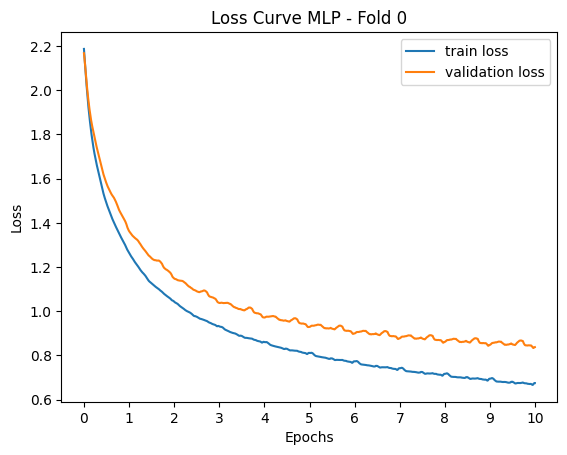

  0%|          | 0/10 [00:00<?, ?it/s]

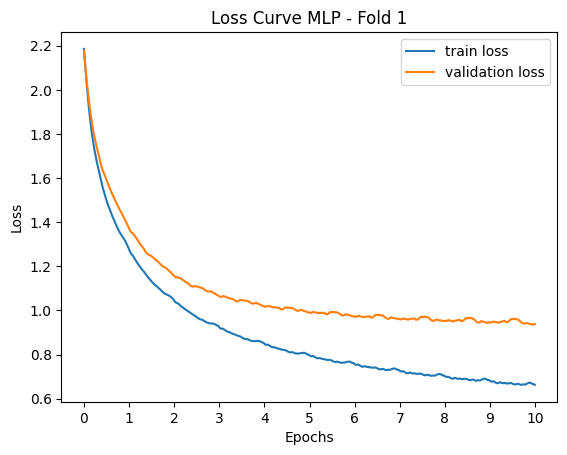

  0%|          | 0/10 [00:00<?, ?it/s]

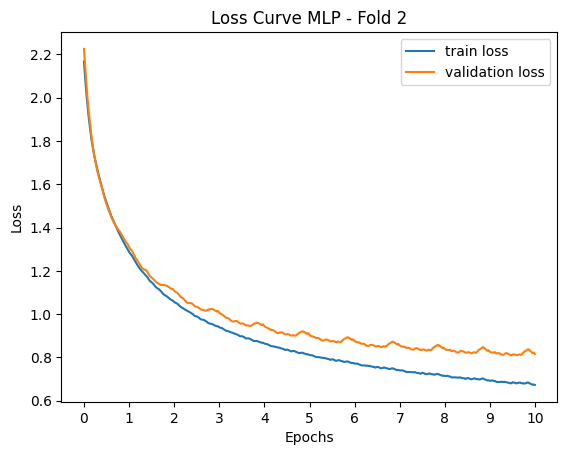

  0%|          | 0/10 [00:00<?, ?it/s]

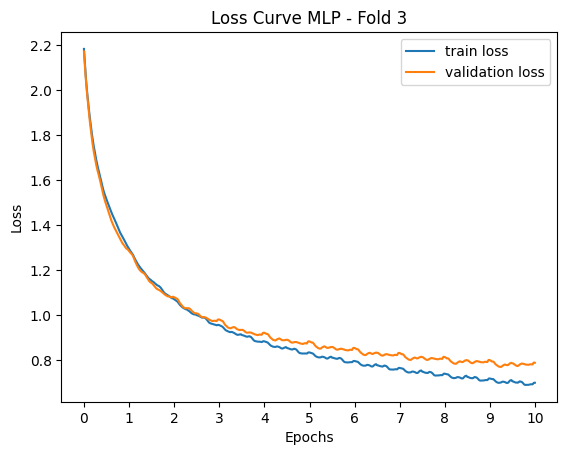

  0%|          | 0/10 [00:00<?, ?it/s]

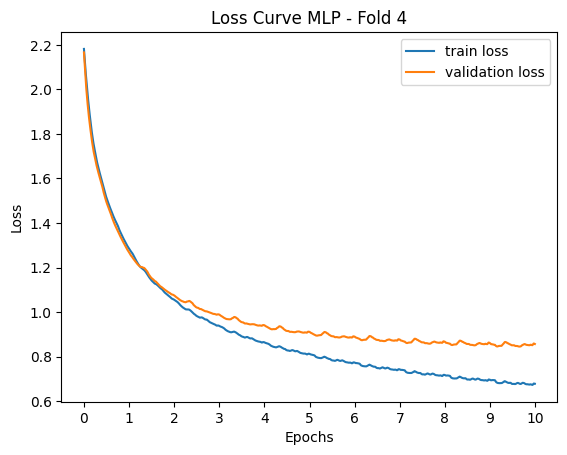




CROSS VALIDATION RESULTS - MLPClassifier
accuracies_mlp = [0.7162790697674418, 0.7116279069767442, 0.7209302325581395, 0.7511627906976744, 0.6930232558139535]
mean_accuracy_mlp = 0.7186046511627907

balanced_accuracies_mlp = 0.7147978079981536
mean_balanced_accuracy_mlp = 0.7147978079981536


TEST DONNEES RESULTS - MLPClassifier
accuracies_test_mlp = 0.7527881040892194
balanced_accuracies_test_mlp = 0.743855391484683


In [10]:
def cross_validation_mlp(n_splits, estimator, X, y, epochs, batch_size):
    kf = KFold(n_splits=5, shuffle=True, random_state=777)
    scores_folds_svm = {
        "accuracy": [],
        "bcc_accuracy": [],
    }

    kf_folds = list(kf.split(X))
    for i, (train_index, test_index) in enumerate(tqdm(kf_folds)):
        estimator = clone(estimator)
        X_train_i = X[train_index]
        X_test_i  = X[test_index]
        y_train_i = y[train_index]
        y_test_i  = y[test_index]

        train_loss_, valid_loss_ = [], []
        epoch_points = [0]

        # Training Loop
        for ep in tqdm(range(epochs)):
            for b in range(batch_size, len(y_train_i), batch_size):
                X_batch, y_batch = X_train_i[b-batch_size:b], y_train_i[b-batch_size:b]
                estimator.partial_fit(X_batch, y_batch, classes=list(np.unique(y)))

                train_loss_.append(log_loss(y_train_i, estimator.predict_proba(X_train_i)))
                valid_loss_.append(log_loss(y_test_i, estimator.predict_proba(X_test_i)))

            epoch_points.append(len(train_loss_))


        # Plot Curve Loss
        plt.title(f"Loss Curve MLP - Fold {i}")
        plt.plot(range(len(train_loss_)), train_loss_, label="train loss")
        plt.plot(range(len(train_loss_)), valid_loss_, label="validation loss")
        plt.xticks(epoch_points, range(0, epochs + 1))
        plt.xlabel("Epochs")
        #plt.xticks(range(batch_size, estimator.n_iter_, 500))
        #plt.xlabel("n_iter")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # Get Accuracies for each fold
        estimator.fit(X_train_i, y_train_i)
        y_pred = estimator.predict(X_test_i)
        scores_folds_svm["accuracy"].append(accuracy_score(y_test_i, y_pred))
        scores_folds_svm["bcc_accuracy"].append(balanced_accuracy_score(y_test_i, y_pred))


    return scores_folds_svm, estimator



mlp = MLPClassifier(hidden_layer_sizes=100, max_iter=100, random_state=777)

scores_mlp, mlp = cross_validation_mlp(5, mlp, X, y, 10, 10)

print("\n\n\nCROSS VALIDATION RESULTS - MLPClassifier")
print("accuracies_mlp =", scores_mlp["accuracy"])
print("mean_accuracy_mlp =", mean(scores_mlp["accuracy"]))
print("\nbalanced_accuracies_mlp =", mean(scores_mlp["bcc_accuracy"]))
print("mean_balanced_accuracy_mlp =", mean(scores_mlp["bcc_accuracy"]))

y_pred_test = mlp.predict(X_test)

print("\n\nTEST DONNEES RESULTS - MLPClassifier")
print("accuracies_test_mlp =", accuracy_score(y_test, y_pred_test))
print("balanced_accuracies_test_mlp =", balanced_accuracy_score(y_test, y_pred_test))

## 1.2 - Trouver les mieux paramètres - GridSearch

In [4]:
def grid_search_cv(estimator, X, y, parameter_space, scoring="neg_log_loss"):
    kf = KFold(n_splits=5, shuffle=True, random_state=777)
    grid = GridSearchCV(
        estimator,
        parameter_space,
        n_jobs=-1,
        cv=kf.split(X),
        verbose=True,
        scoring=scoring
    )

    grid.fit(X, y)
    return grid

In [12]:
warnings.filterwarnings("ignore")

mlp_gs = MLPClassifier(max_iter=100, random_state=777)

parameter_space = {
    'hidden_layer_sizes': [150, 200, 300],
    'activation': ['relu'],
    'max_iter': [100, 150, 200, 220],
    'solver': ['adam'],
    'alpha': [0.0001]
}


grid = grid_search_cv(mlp_gs, X, y, parameter_space)

print("Best Params:", grid.best_params_)

y_pred_test = grid.predict(X_test)


print("\n\nTEST DONNEES RESULTS - Mieux modèle MLPClassifier")
print("meiux_acc_test_mlp =", accuracy_score(y_test, y_pred_test))
print("meiux_acc_bac_acc_test_mlp =", balanced_accuracy_score(y_test, y_pred_test))


# TEST DONNEES RESULTS - Meiux modèle MLPClassifier
# meiux_acc_test_mlp = 0.7565055762081785
# meiux_acc_bac_acc_test_mlp = 0.7483358841860404

Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 200, 'max_iter': 100, 'solver': 'adam'}


TEST DONNEES RESULTS - Mieux modèle MLPClassifier
meiux_acc_test_mlp = 0.7565055762081785
meiux_acc_bac_acc_test_mlp = 0.7483358841860404


# 2 - SVM Classifier
## 2.1 - Validation Croisée

In [9]:
svm = SVC(random_state=777)

scores_svm = cross_validate(
    svm,
    X,
    y,
    verbose=False,
    scoring=["accuracy", "balanced_accuracy"]
)

print("\n\nCROSS VALIDATION RESULTS - SVMClassifier")
print("accuracies_svm =", scores_svm["test_accuracy"])
print("mean_accuracy_svm =", scores_svm["test_accuracy"].mean())
print("\nbalanced_accuracies_svm =", scores_svm["test_balanced_accuracy"])
print("mean_balanced_accuracy_svm =", scores_svm["test_balanced_accuracy"].mean(), "\n\n")



CROSS VALIDATION RESULTS - SVMClassifier
accuracies_svm = [0.68604651 0.6744186  0.64186047 0.66511628 0.66976744]
mean_accuracy_svm = 0.6674418604651162

balanced_accuracies_svm = [0.67337286 0.66044135 0.63026433 0.65282584 0.66017005]
mean_balanced_accuracy_svm = 0.6554148856823716 




## 2.2 - Trouver les mieux paramètres - GridSearch

In [10]:
svm_gs = SVC(random_state=777)

parameter_space = {
    #'scoring': ['balanced_accuracy'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr'],
    'C': list(np.logspace(-1, 3, 5)),
    'gamma': ['scale'],
    #'degree': [2, 3, 4, 5],
    #'coef0': np.linspace(-1, 2, 4),
}


grid = grid_search_cv(svm_gs, X, y, parameter_space, scoring='balanced_accuracy')

print("Best Params:", grid.best_params_)

y_pred_test = grid.predict(X_test)


print("\n\nTEST DONNEES RESULTS - Meiux modèle SVM Classifier")
print("meiux_acc_test_svm =", accuracy_score(y_test, y_pred_test))
print("meiux_acc_bac_acc_test_svm =", balanced_accuracy_score(y_test, y_pred_test))

#Fitting 5 folds for each of 24 candidates, totalling 120 fits
#Best Params: {'C': np.float64(1000.0), 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


#TEST DONNEES RESULTS - Meiux modèle SVM Classifier
#meiux_acc_test_svm = 0.7379182156133829
#meiux_acc_bac_acc_test_svm = 0.7358141454805576


Best Params: {'C': np.float64(100.0), 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


TEST DONNEES RESULTS - Meiux modèle SVM Classifier
meiux_acc_test_svm = 0.7267657992565055
meiux_acc_bac_acc_test_svm = 0.7224639462459341


## Sensibilité à la taille de l'ensemble d'entraînement

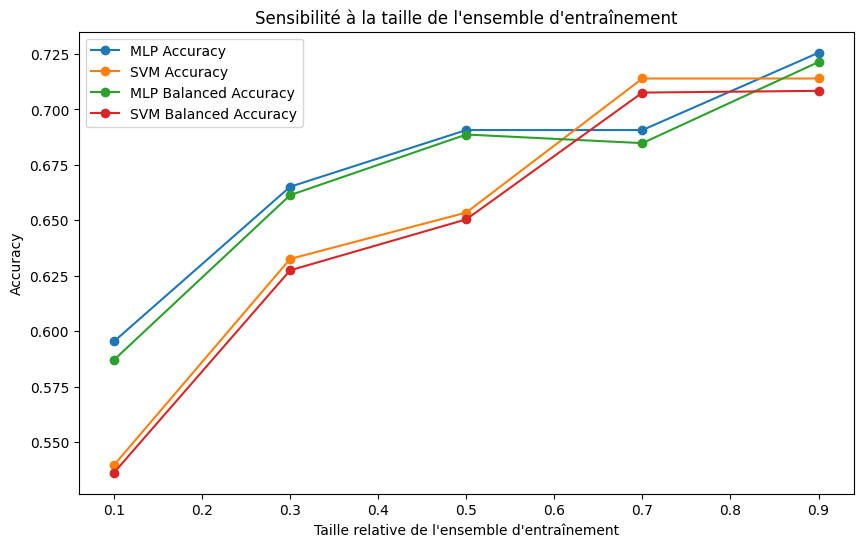

In [19]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_sizes = np.linspace(0.1, 0.9, 5)  # 10% à 90% de la taille d'entraînement
mlp_accuracies = []
mlp_balanced_accuracies = []
svm_accuracies = []
svm_balanced_accuracies = []

mlp_best_params = {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 200, 
                   'max_iter': 100, 'solver': 'adam', 'random_state': 777}

svm_best_params = {'C': np.float64(1000.0), 'decision_function_shape': 'ovo', 
                   'gamma': 'scale', 'kernel': 'linear', 'random_state': 777}


mlp_best = MLPClassifier(**mlp_best_params)
svm_best = SVC(**svm_best_params)

for train_size in train_sizes:
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    
    # MLP
    mlp_best.fit(X_train_sample, y_train_sample)
    mlp_predictions_sample = mlp_best.predict(X_test)
    mlp_accuracies.append(accuracy_score(y_test, mlp_predictions_sample))
    mlp_balanced_accuracies.append(balanced_accuracy_score(y_test, mlp_predictions_sample))
    
    # SVM
    svm_best.fit(X_train_sample, y_train_sample)
    svm_predictions_sample = svm_best.predict(X_test)
    svm_accuracies.append(accuracy_score(y_test, svm_predictions_sample))
    svm_balanced_accuracies.append(balanced_accuracy_score(y_test, svm_predictions_sample))


# Visualisation de la sensibilité à la taille d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mlp_accuracies, label='MLP Accuracy', marker='o')
plt.plot(train_sizes, svm_accuracies, label='SVM Accuracy', marker='o')
plt.plot(train_sizes, mlp_balanced_accuracies, label='MLP Balanced Accuracy', marker='o')
plt.plot(train_sizes, svm_balanced_accuracies, label='SVM Balanced Accuracy', marker='o')
plt.title("Sensibilité à la taille de l'ensemble d'entraînement")
plt.xlabel('Taille relative de l\'ensemble d\'entraînement')
plt.ylabel('Accuracy')
plt.legend()
#plt.grid(True)
plt.show()

## Impact de la suppression des 3 dernières caractéristiques 

In [20]:
# Supprimer les colonnes Y_Feature, Cr_Feature, Cb_Feature
X_reduced = X[:, :-3]

# Diviser en ensemble d'entraînement et de test avec les caractéristiques réduites
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Répéter les entraînements et évaluations avec les caractéristiques réduites

# MLP avec les caractéristiques réduites
mlp_best.fit(X_train_red, y_train_red)
mlp_predictions_red = mlp_best.predict(X_test_red)
mlp_accuracy_red = accuracy_score(y_test_red, mlp_predictions_red)
mlp_balanced_accuracies_red = balanced_accuracy_score(y_test_red, mlp_predictions_red)
print(f"\nMLP Accuracy avec caractéristiques réduites: {mlp_accuracy_red:.2f}")
print(f"\nMLP Balanced Accuracy avec caractéristiques réduites: {mlp_balanced_accuracies_red:.2f}")


# SVM avec les caractéristiques réduites
svm_best.fit(X_train_red, y_train_red)
svm_predictions_red = svm_best.predict(X_test_red)
svm_accuracy_red = accuracy_score(y_test_red, svm_predictions_red)
svm_balanced_accuracies_red = balanced_accuracy_score(y_test_red, svm_predictions_red)
print(f"\nSVM Accuracy avec caractéristiques réduites: {svm_accuracy_red:.2f}")
print(f"\nSVM Balanced Accuracy avec caractéristiques réduites: {svm_balanced_accuracies_red:.2f}")


MLP Accuracy avec caractéristiques réduites: 0.75

MLP Balanced Accuracy avec caractéristiques réduites: 0.75

SVM Accuracy avec caractéristiques réduites: 0.71

SVM Balanced Accuracy avec caractéristiques réduites: 0.70


# Deuxième partie

## I. Architecture du CNN

Epoch 1/15


2025-01-15 16:37:20.761699: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2025-01-15 16:37:20.836738: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2025-01-15 16:37:20.868617: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2025-01-15 16:37:23.007137: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.
2025-01-15 16:37:23.007327: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 65028096 exceeds 10% of free system memory.


53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 684ms/step - accuracy: 0.3460 - loss: 6.8926 - val_accuracy: 0.1581 - val_loss: 2.5023
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6250 - loss: 1.2118 - val_accuracy: 0.1605 - val_loss: 2.4531
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 658ms/step - accuracy: 0.4675 - loss: 1.6152 - val_accuracy: 0.4442 - val_loss: 1.5569
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5625 - loss: 1.6582 - val_accuracy: 0.4465 - val_loss: 1.5447
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 706ms/step - accuracy: 0.5693 - loss: 1.3140 - val_accuracy: 0.3419 - val_loss: 1.7590
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5938 - loss: 1.3243 - val_accuracy: 0.3605 - val_loss: 1.7137
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 784ms/step - accuracy: 0.6156 - loss: 1.1282 - val_accuracy: 0.5907 - val_loss: 1.1984
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7500 - loss: 0.8592 - val_accuracy: 0.5860 - val_

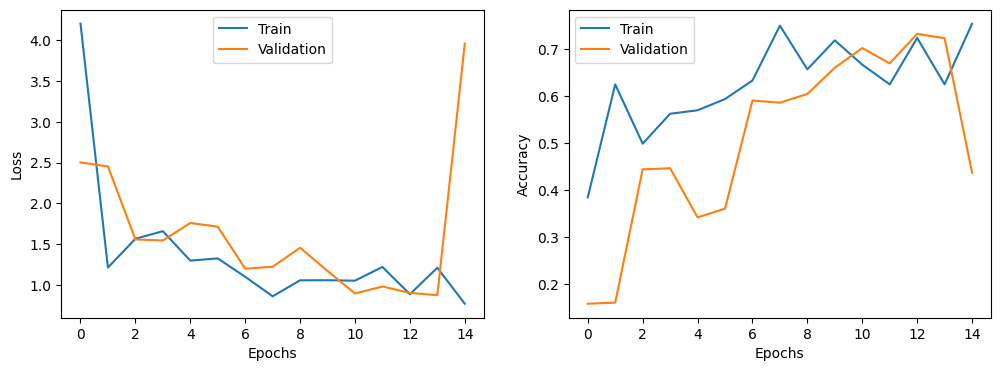

In [45]:
# Load the 'database.csv' file to retrieve class information
data = pd.read_csv('database.csv')
data = data.sort_values(by="Numero", ascending=True)
data.reset_index(drop=True, inplace=True)
classes = data['SousClasse']

# Load corresponding images based on image number
image_folder = 'images_128'
images = []

# List available image numbers
image_numbers = data['Numero'].values

# Read and append each image to the images list
for i in range(len(data)):
    image_path = os.path.join(image_folder, f'{i}.jpg')
    img = imread(image_path)
    images.append(img)

# Pre-process the images
X_cnn = np.array(images)

# Encode classes into numeric labels (0 to 7 for the eight subclasses)
class_labels = ['COTE', 'FORET', 'AUTOROUTE', 'VILLE', 'MONTAGNE', 'OPEN_COUNTRY', 'RUE', 'GRANDBATIMENT']
class_dict = {label: i for i, label in enumerate(class_labels)}
y_cnn = np.array([class_dict[class_name] for class_name in classes])


# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# Convert labels to one-hot encoding format
y_train = to_categorical(y_train, 8)
y_val = to_categorical(y_val, 8)
y_test = to_categorical(y_test, 8)

# Define the CNN model for training
def train_cnn_model(X_train, y_train, X_val, y_val, input_shape, num_classes, num_epochs=20, batch_size=32):
    # Data augmentation to generate more training data from existing images
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(X_train)

    # Define the CNN model structure
    model = Sequential()

    # Add convolutional layer with 32 filters
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    # Add another convolutional layer with 64 filters
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    # Add another convolutional layer with 128 filters
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    
    # Add dense layer with 256 units
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer for multiclass classification
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Callbacks for early stopping and model checkpoint
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)  # Updated extension
    
    # Train the model
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        steps_per_epoch=int(len(X_train) / batch_size),  # Ensure this is an integer
        validation_data=(X_val, y_val),
        epochs=num_epochs,
        callbacks=[early_stopping, model_checkpoint]
        )

    return model, history

# Train the CNN model
input_shape = (128, 128, 3)
num_classes = 8
model, history = train_cnn_model(X_train, y_train, X_val, y_val, input_shape, num_classes, num_epochs=15)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the balanced accuracy of the model
bal_accuracy = balanced_accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
print("Balanced Accuracy:", bal_accuracy)

# Define a function to compute the confidence interval
def bootstrap_ci(data, num_samples=1000, alpha=0.05):
    """Returns the confidence interval of the mean."""
    means = np.array([np.random.choice(data, len(data)).mean() for _ in range(num_samples)])
    conf_interval = np.percentile(means, [100*alpha/2., 100*(1-alpha/2.)])
    return conf_interval

# Compute the confidence interval for the model's accuracy
conf_interval = bootstrap_ci((y_pred_classes == np.argmax(y_test, axis=1)).astype(int))
print(f"Confidence interval for accuracy: {conf_interval}")

# Plot the training curves to visualize model performance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## II. Transfer Learning avec VGG16

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │        40,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,755,878 (56.29 MB)

 Trainable params: 41,190 (160.90 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Model training...
Epoch 1/20
31/31 - 33s - 1s/step - accuracy: 0.1912 - loss: 2.1474 - val_accuracy: 0.3209 - val_loss: 1.9098
Epoch 2/20
31/31 - 27s - 872ms/step - accuracy: 0.4486 - loss: 1.6620 - val_accuracy: 0.5907 - val_loss: 1.4294
Epoch 3/20
31/31 - 33s - 1s/step - accuracy: 0.6005 - loss: 1.2926 - val_accuracy: 0.6372 - val_loss: 1.1361
Epoch 4/20
31/31 - 35s - 1s/step - accuracy: 0.6956 - loss: 1.0873 - val_accuracy: 0.7023 - val_loss: 0.9931
Epoch 5/20
31/31 - 27s - 882ms/step - accuracy: 0.7240 - loss: 0.9542 - val_accuracy: 0.7488 - val_loss: 0.8787
Epoch 6/20
31/31 - 29s - 948ms/step - accuracy: 0.7597 - loss: 0.8559 - val_accuracy: 0.7721 - val_loss: 0.8186
Epoch 7/20
31/31 - 34s - 1s/step - accuracy: 0.7783 - loss: 0.7863 - val_accuracy: 0.7814 - val_loss: 0.7402
Epoch 8/20
31/31 - 35s - 1s/step - accuracy: 0.7871 - loss: 0.7326 - val_accuracy: 0.8093 - val_loss: 0.7078
Epoch 9/20
31/31 - 32s - 1s/step - accuracy: 0.7979 - loss: 0.6909 - val_accuracy: 0.8000 - val_loss:

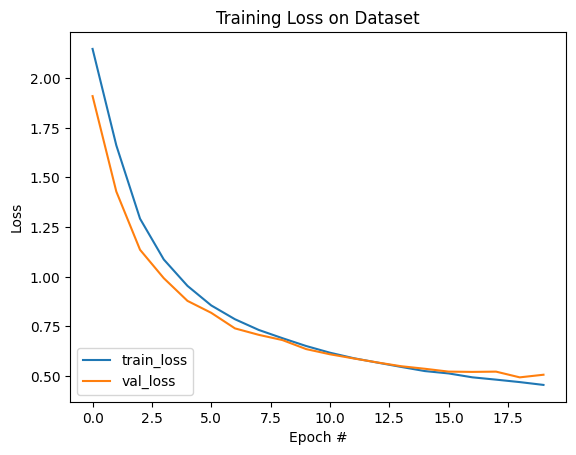

In [ ]:
# ADJUSTING THE SHAPE OF NUMPY ARRAYS OF IMAGES
I=imtrain[0]
(img_width, img_height, nb_plan)=np.shape(I)

#vérification pour que les entrées du réseau soient correctes
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


imdatatrain = np.reshape(
    imtrain,
    (len(imtrain), input_shape[0], input_shape[1], input_shape[2])
)

imdatatest = np.reshape(
    imtest,
    (len(imtest), input_shape[0], input_shape[1], input_shape[2])
)
labeltrain = to_categorical(datalabeltrain, num_classes=10)  # Ensure num_classes matches
labeltest = to_categorical(datalabeltest, num_classes=10)


# Initialize VGG16 model for transfer learning
model = VGG16(include_top=False, input_shape=input_shape)

# Freeze the layers of VGG16 model except the classifier layers
for layer in model.layers:
    layer.trainable = False
    
# Add custom classifier layers to the model
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(20, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)  # Change to 10 classes
model = Model(inputs=model.inputs, outputs=output)
# Display model summary
model.summary()
# Initialize optimizer
opt = SGD(learning_rate=0.001, momentum=0.9)
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
n_epochs=20
print('Model training...')
H=model.fit(
            imdatatrain, labeltrain,
            epochs=n_epochs,batch_size=64,
            validation_split=0.1, verbose=2)
print(H.history)

# Plot training loss
N = np.arange(0, n_epochs)
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.legend(loc="lower left")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.title("Training Loss on Dataset")
  
# Evaluate the model on test data
score = model.evaluate(imdatatest,labeltest, batch_size=64)


# Make predictions on test data
prediction = model.predict(imdatatest)
lesclasses=np.argmax(prediction, axis=1)

# Calculate confusion matrix and accuracy score
mc_CNN = confusion_matrix(datalabeltest, lesclasses)
ac_CNN = accuracy_score(datalabeltest, lesclasses)
test=np.where(lesclasses==datalabeltest)
nbrimage=np.max(test)
taille_test=np.shape(test)

In [53]:
print(f"score transfert learning = {score}")
print(f'bien classées par transfert = {taille_test[1]} sur {nbrimage}, donc accuracy de {taille_test[1]/nbrimage}')

score transfert learning = [0.5062732696533203, 0.8494423627853394]
bien classées par transfert = 457 sur 537, donc accuracy de 0.851024208566108
